In [16]:
import matplotlib
from matplotlib import style 
style.use('seaborn')
import matplotlib.pyplot as plt

import numpy as np


In [17]:
import pandas as pd
import sqlite3 as sql
import os

In [18]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, func


In [19]:
engine = create_engine("sqlite:///EmployeeSQL/Employee.db", echo=False)
conn = engine.connect()
salary = pd.read_sql("SELECT * FROM salaries", conn)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [20]:
employee = pd.read_sql("SELECT * FROM employees", conn)
employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [21]:
#Most common salary ranges for employees
employee_salary = employee.merge(salary, on = "emp_no")
employee_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


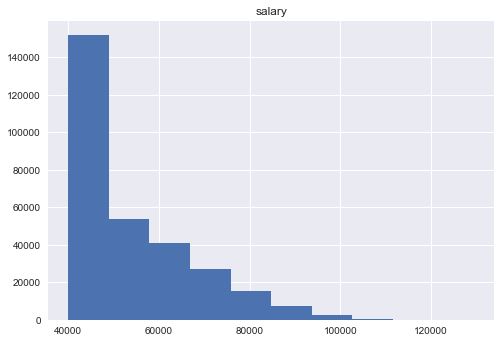

In [22]:
#Histogram Salary Count
employee_salary.hist(column="salary")
plt.savefig("Images/ Most Common Salary Count1")

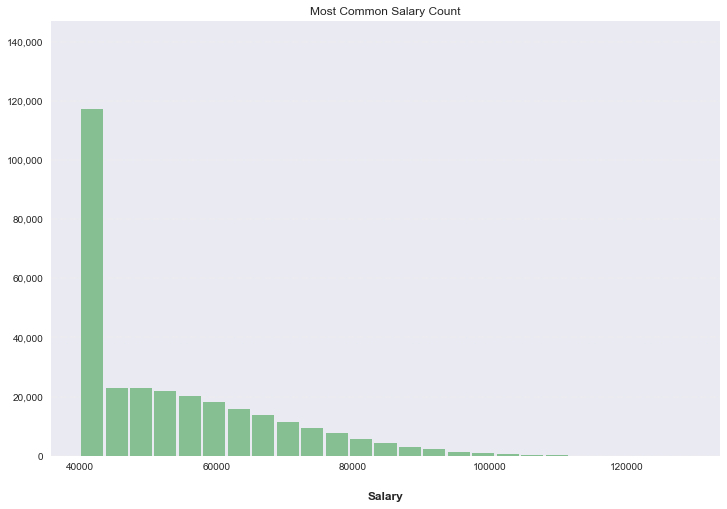

In [23]:
# Clean histogram from Matplotlib strMethodFormatter
from matplotlib.ticker import StrMethodFormatter

ax = employee_salary.hist(column="salary", bins = 25, grid = False, 
                          figsize = (12,8), color ="#86bf91", zorder = 2, rwidth = 0.9)
ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    x.tick_params(axis="both", which="both", bottom = "off", top ="off", 
                  labelbottom = "on", left = "off", right = "off", labelleft = "on")
    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle = "dashed", alpha = 0.4, color = '#eeeeee', zorder = 1)
        
    x.set_title("Most Common Salary Count")
    
    
    x.set_xlabel("Salary", labelpad = 20, weight = "bold", size = 12)
    
    
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
    plt.savefig("Images/ Most Common Salary Count2")
    

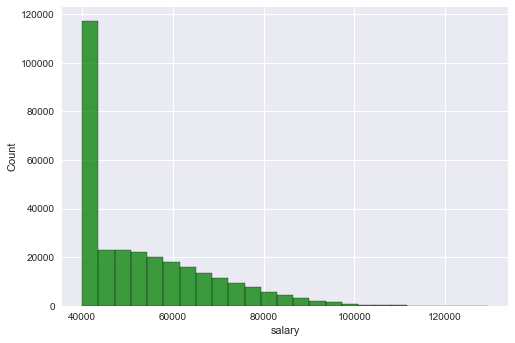

In [24]:
# Histogram for Most Common Salary using seaborn

import seaborn as sns
#employee_sal = sns.load_dataset("employee_salary")
sns.histplot(data = employee_salary, bins = 25, x = "salary", color = "green") #palette = sns.color_palette("pastel"))
plt.savefig("Images/ Most Common Salary Count3")

In [25]:
title = pd.read_sql("SELECT * FROM titles", conn)
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [26]:
sal_title = employee_salary.merge(title, left_on = "emp_title_id", right_on ="title_id")
sal_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,s0001,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,s0001,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,s0001,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,s0001,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,s0001,Staff


In [27]:
# Dataframe showing only salary and title

salary_title = sal_title[["salary", "title"]] 
salary_title.head()

,salary,title
0,40000,Staff
1,40000,Staff
2,56087,Staff
3,87084,Staff
4,63016,Staff


In [28]:
#count rows in the salary title dataframe

salary_title.count()

salary    300024
title     300024
dtype: int64

In [29]:
# Average salary by title
sal_ttl = salary_title.groupby("title")["salary"].mean().round(2).to_frame("salary")
sal_ttl.head(10)

sal_ttl = sal_ttl.reset_index()
sal_ttl


,title,salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


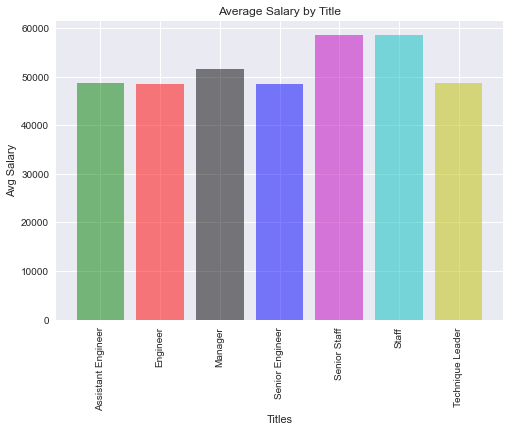

In [32]:
x_axis = sal_ttl["title"]
ticks = np.arange(len(x_axis))
y_axis = sal_ttl["salary"]

plt.bar(x_axis, y_axis, align = "center", alpha = 0.5, color = ["g", "r", "k", "b", "m", "c", "y"])
plt.xticks(ticks, x_axis, rotation ="vertical")

plt.ylabel("Avg Salary")
plt.xlabel("Titles")
plt.title("Average Salary by Title")

plt.savefig("Images/Avg Salary by Title")

plt.show()
